In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
len(df)

344

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Desse modo, várias informações são apresentadas, como as variáveis, número de valores não nulos, o tipo de cada uma delas e o tamanho do conjunto de dados em memória. 

Note que as variáveis species, island e sex são variáveis do tipo object. Isso quer dizer que não são int ou float. No nosso caso, elas são variáveis discretas nominais, pois sexo, espécie e ilha não tem ordem inerente nos dados.


## Dados faltantes
Note que algumas das variáveis contém valores nulos (dados faltantes). Talvez seja interessante criar uma tabela com esse tipo de informação. Para isso podemos utilizar o seguinte código:

In [5]:
from matplotlib import pyplot as plt
missing_data_size = df.isnull().sum()
missing_data_columns = (
    (
        missing_data_size[missing_data_size > 0]
    )
    .sort_values(ascending=False)
    .to_frame(name='Count')
)
missing_data_columns = (
    missing_data_columns.assign(
        Column=missing_data_columns.index
    )
).reset_index(drop=True)

Isso criará uma tabela chamada missing_data_columns. No entanto o mais interessante seria criar um gráfico com essa informação, para isso, utilize:

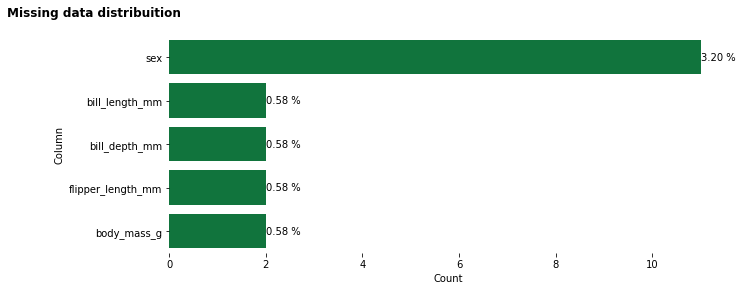

In [6]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=missing_data_columns, x='Count', y='Column', color="#00853B")
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in missing_data_columns.Count.astype(int) / len(df) * 100])
plt.suptitle("Missing data distribuition", ha='left', va='top', x=-.1, fontweight='bold')
plt.show()

O que podemos fazer com essa informação? A resposta é simples, podemos utilizar as técnicas aprendidas para tratar dados faltantes. Note que a quantidade de dados faltantes para as variáveis bill_lenght_mm, bill_depth_mm, flipper_lenght_mm e flipper_depth_mm é a mesma, apenas duas instâncias. Podemos verificar então se essas instâncias são as mesmas. Como essa quantidade é pequena (apenas 0.58% do conjunto de dados), podemos excluir estas instâncias. Por outro lado, a quantidade de dados faltantes para o sexo (sex) é relativamente maior, pouco mais que 3%. Nesse caso podemos utilizar uma alternativa de imputação de dados, utilizando o valor mais frequente.

Através do seguinte código, verificamos quais os indexes dos valores faltantes:

In [7]:
for column in missing_data_columns.Column:
    indexes = list(df[df[column].isnull()].index)
    print(f'{column}: {indexes}')

sex: [3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339]
bill_length_mm: [3, 339]
bill_depth_mm: [3, 339]
flipper_length_mm: [3, 339]
body_mass_g: [3, 339]


Note que os valores faltantes nas colunas bill_length_mm, bill_depth_mm, flipper_length_mm e body_mass_g tem os mesmos indexes, como previsto. Deste modo, podemos excluir estas duas linhas.

In [8]:
df = df.drop(index=[3, 339], axis=0).reset_index(drop=True)

Agora temos somente 9 valores faltantes na coluna sex. Utilizaremos neste caso o valor mais frequente, no entanto você pode escolher outra técnica no seu conjunto de dados.

In [9]:
df = df.fillna(df.mode().squeeze())

Agora não temos nenhum valor faltante no nosso conjunto de dados.

## Distribuição das variáveis
Iremos agora verificar qual a distribuição de cada uma das variáveis do nosso conjunto de dados através de visualizações de tal modo que possamos responder a perguntas do tipo:

Qual a quantidade de pinguins em cada ilha?
Qual a distribuição de sexo dos pinguins?
Qual a distribuição dos comprimentos e larguras das nadadeiras?
Qual a distribuição dos comprimentos e larguras dos bicos?
Iremos começar com a distribuição das variáveis discretas, usando o seguinte código:

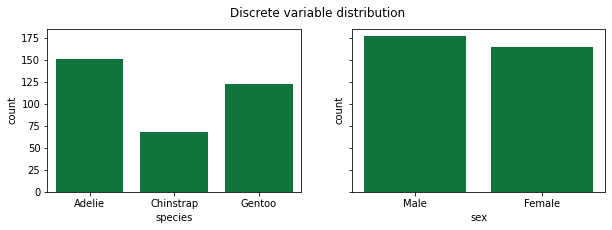

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
fig.suptitle('Discrete variable distribution')
sns.countplot(ax=axes[0], x="species", data=df, color="#00853B")
sns.countplot(ax=axes[1], x="sex", data=df, color="#00853B")
plt.show()

O conjunto de dados parece estar balanceado quando diz respeito ao sexo. No entanto, em relação as espécies e ilhas, temos um conjunto desbalanceado. Temos mais pinguins da espécie Adelie e mais incidência na ilha Biscoe. Em contrapartida, temos uma baixa incidência de pinguins na ilha de Torgesen e um pequeno número de pinguins da espécie Chistrap.

Também podemos verificar a distribuição das variáveis contínuas. Para tal, utilizaremos histogramas.

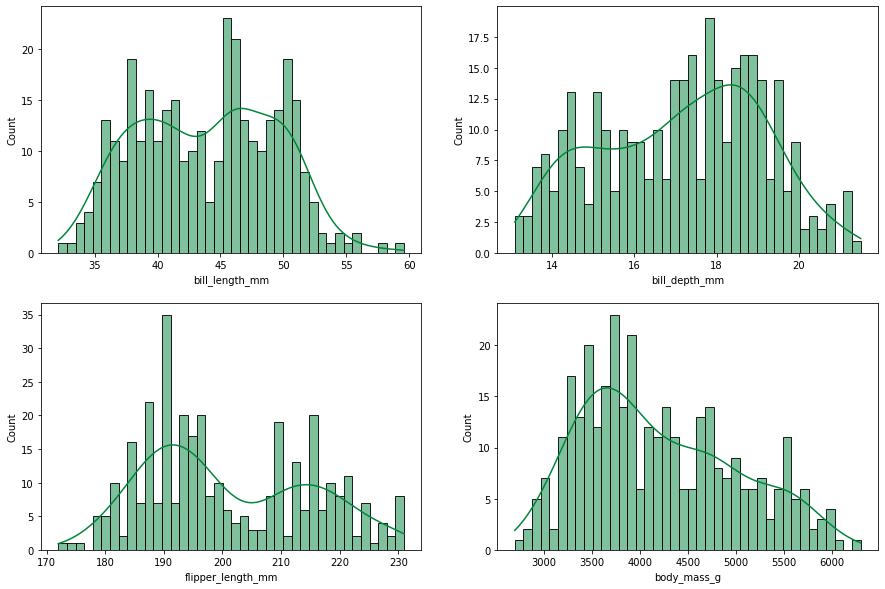

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
float_columns = df.select_dtypes(include=[float]).columns
for column, axe in zip(float_columns, fig.axes):
    sns.histplot(ax=axe, data=df, x=column, bins=40, kde=True, color="#00853B")
plt.show()

Podemos notar que as variáveis bill_lenght, bill_depth e flipper_lenght tem duas modas cada uma delas. Uma hipótese é que sejam modas de diferentes sexos.

Também podemos utilizar gráficos de box-plot para dar mais informações sobre as distribuições de variáveis contínuas.

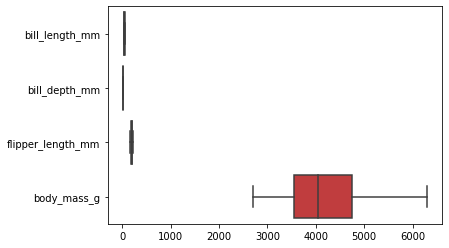

In [23]:
sns.boxplot(data=df, orient="h");

No entanto, por conta da diferença de escala entre as variáveis, fica impossível visualizar informações das variáveis diferentes do peso. Resolvemos então plotar de maneira separada:

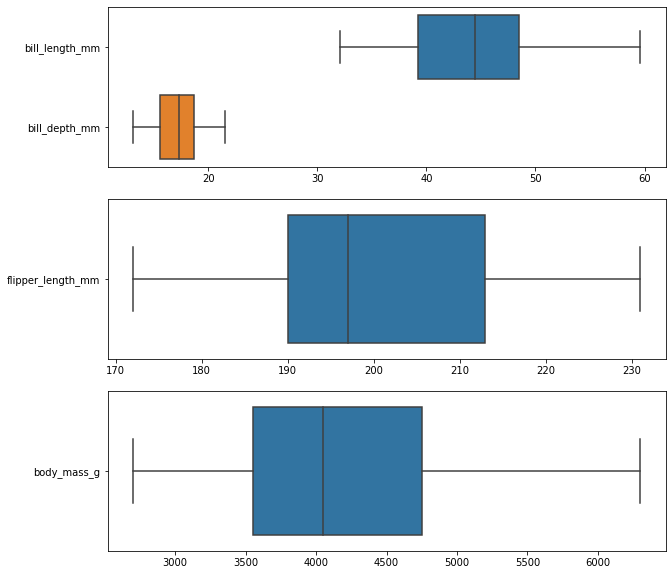

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.boxplot(ax=axes[0], data=df[["bill_length_mm", "bill_depth_mm"]], orient="h")
sns.boxplot(ax=axes[1], data=df[["flipper_length_mm"]], orient="h")
sns.boxplot(ax=axes[2], data=df[["body_mass_g"]], orient="h")
plt.show()

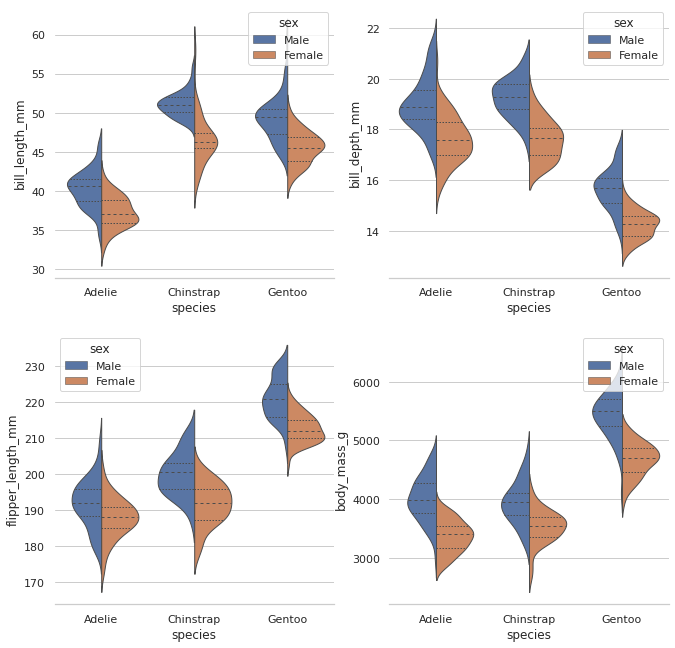

In [26]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(11, 11))
sns.violinplot(ax=fig.axes[0], data=df, x="species", y="bill_length_mm", hue="sex", split=True, inner="quart", linewidth=1)
sns.violinplot(ax=fig.axes[1], data=df, x="species", y="bill_depth_mm", hue="sex", split=True, inner="quart", linewidth=1)
sns.violinplot(ax=fig.axes[2], data=df, x="species", y="flipper_length_mm", hue="sex", split=True, inner="quart", linewidth=1)
sns.violinplot(ax=fig.axes[3], data=df, x="species", y="body_mass_g", hue="sex", split=True, inner="quart", linewidth=1)
sns.despine(left=True)

O que percebemos é que os pinguins do sexo feminino tem menores dimensões e massa quando comparados aos pinguins do sexo masculino. Independente da raça. Desse modo podemos afirmar que as modas geradas dizem respeito sim ao sexo dos pinguins, quando separados por espécie.

Outra visualização interessante é a comparação dois a dois das variáveis contínuas, tendo como condicional a espécie. 